# churn modeling

<p> Here in this part of this project, i am going to some modeling to choose what is the best model in supervised learning based on accuracy of prediction on testing set. </p>

<h3> prepare data and explore it </h3>


In [1]:
import numpy as np
import pandas as pd
from IPython.display import display

np.random.seed(42)
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
#to set RowNumber our counter 
data.set_index('RowNumber' , inplace = True)
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
#load data into x(features),y(labels)
x = data.iloc[:,2:12] # loak for more advanced iloc
y = np.array(data['Exited'])
display(x.head(10))
print(y)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
3,502,France,Female,42,8,159660.80,3,1,0,113931.57
4,699,France,Female,39,1,0.00,2,0,0,93826.63
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
6,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
7,822,France,Male,50,7,0.00,2,1,1,10062.80
8,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
9,501,France,Male,44,4,142051.07,2,0,1,74940.50


[1 0 1 ... 1 1 0]


In [4]:
import matplotlib.pyplot as plt

x_label =data['Exited']
y_label =data['Age']
#for_ploting_y = y_label.apply(lambda x:np.log(x))
#plt.pie(x_label,y_label)
#print(for_ploting_y)
plt.polar(x_label,y_label)


In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
france = data[data['Geography']=='France']['CustomerId'].count()
spain  = data[data['Geography']=='Spain']['CustomerId'].count()
germany= data[data['Geography']=='Germany']['CustomerId'].count()
print(france,spain,germany)

(5014, 2477, 2509)


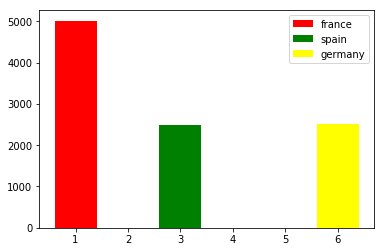

In [7]:
bar_width = 6000

opacity = 0.4
#arange = plt.subplot()
x_geo = [1,3,6] 
y_geo= [france, spain, germany]
bar1 = plt.bar(x_geo[0],y_geo[0],label = 'france',color = 'red')
bar2 = plt.bar(x_geo[1],y_geo[1],label = 'spain',color = 'green')
bar3 = plt.bar(x_geo[2],y_geo[2],label = 'germany',color = 'yellow')
#group=3
#index = np.arange(group)
#arange.bar(index,array_collection,bar_width)
#arange.set_xlabel('Group')
#arange.set_ylabel('Scores')
#arange.set_title('number of people')
#arange.set_xticklabels(('A', 'A', 'B','C'))
plt.legend()

In [9]:
cal= data[data['IsActiveMember']==1].count()
print(cal[1])
cal2 = data[data['Exited']==1].count()
print(cal2[1])


5151
2037


In [10]:
ave = (cal2/(cal+cal2))*100
va= '%.1f '  % ave[1]
print va+'%'

28.3 %


In [11]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

label_geo_x =  LabelEncoder()
x['Geography'] = label_geo_x.fit_transform(x['Geography']) #update values
print(x['Geography'].head())

#this output is distribute by give 0 to french, give 1 to germany, give 2 to spain

RowNumber
1    0
2    2
3    0
4    0
5    2
Name: Geography, dtype: int64


In [12]:
label_gender_x = LabelEncoder()
x['Gender'] = label_gender_x.fit_transform(x['Gender'])
print(x['Gender'].head())
# male = 1,female = 0

RowNumber
1    0
2    0
3    0
4    0
5    0
Name: Gender, dtype: int64


In [13]:
onehotencoder = OneHotEncoder(categorical_features = [1])
x = onehotencoder.fit_transform(x).toarray()
print(x)

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


<h3> splitting data </h3>

In [14]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.25,random_state=0)
print(train_y)

RowNumber
2968    1
701     0
3482    0
1622    1
801     0
8943    0
3981    0
3664    1
7879    1
2331    0
5844    0
641     1
6805    0
2463    1
5794    0
7509    0
6382    0
8471    0
6775    1
1978    1
917     1
2984    0
218     0
1626    0
9295    0
4314    0
6294    0
3321    0
2618    1
9029    0
       ..
756     0
8292    0
2497    0
7600    1
1872    0
2047    0
7878    1
4852    0
5073    0
2164    0
6037    0
6922    0
6217    0
538     0
9894    0
2898    0
7769    0
2223    0
2600    0
706     1
3469    0
6745    0
5875    0
4374    1
7892    0
9226    0
4860    0
3265    0
9846    0
2733    1
Name: Exited, Length: 7500, dtype: int64


In [30]:
from sklearn.metrics import accuracy_score
from time import *
def choose_best(model, train_x , train_y , test_x , test_y):
    result = {}
    
    #for calculate time of fitting data
    start = time()
    model.fit(train_x,train_y)
    end = time()
    result['train_time'] = end-start
    
    #for prediction
    
    start = time()
    test_y_new = model.predict(test_x)
    train_y_new = model.predict(train_x)
    end = time()
    result["y_pred"] = test_y_new
    
    result["prediction_time"] = end - start
    
    result['acc_prediction_train'] = accuracy_score(train_y,train_y_new)
    
    result['acc_pred_test'] = accuracy_score(test_y,test_y_new)
    
    print('name of model {}'.format(model))
    
    return result
    

In [31]:
from sklearn.linear_model import LogisticRegression

classifier_1 = LogisticRegression(random_state = 42)
values1 = choose_best(classifier_1,train_x,train_y,test_x,test_y)
print(values1)

name of model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
{'train_time': 0.06800007820129395, 'prediction_time': 0.0009999275207519531, 'acc_pred_test': 0.7864, 'acc_prediction_train': 0.7905333333333333, 'y_pred': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)}


In [32]:
from sklearn.ensemble import AdaBoostClassifier

classifier_2 = AdaBoostClassifier(random_state=42)
values2 = choose_best(classifier_2,train_x,train_y,test_x,test_y)
print(values2["y_pred"])

name of model AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42)
[0 0 0 ... 0 0 0]


In [33]:
from sklearn.ensemble import GradientBoostingClassifier

classifier_3 = GradientBoostingClassifier()
values3 = choose_best(classifier_3,train_x,train_y,test_x,test_y)
print(values3['y_pred'])

name of model GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
[0 0 0 ... 0 0 0]


In [19]:
moduels = pd.DataFrame({'name_model':["logistic regression","adaboost","gradient boost"],\
                       'accuracy_training':[values1["acc_prediction_train"],values2['acc_prediction_train'],values3['acc_prediction_train']],\
                       "accuracy_testing":[values1["acc_pred_test"],values2["acc_pred_test"],values3["acc_pred_test"]],\
                        "timing_train":[values1["train_time"],values2["train_time"],values3["train_time"]],\
                       "timing_test":[values1["prediction_time"],values2["prediction_time"],values3["prediction_time"]]})
moduels.sort_values(by =["accuracy_testing"], ascending = False)

,accuracy_testing,accuracy_training,name_model,timing_test,timing_train
2,0.8676,0.872267,gradient boost,0.020,0.646
1,0.8628,0.855200,adaboost,0.072,0.385
0,0.7864,0.790533,logistic regression,0.006,0.050


In [20]:
from sklearn.model_selection import GridSearchCV

parameters = [{'loss':['deviance'],'learning_rate':[1.0,2.0],'n_estimators':[100],
              'max_depth':[3],'criterion':['friedman_mse'], 'init':[None],
              'max_features':[None], 'max_leaf_nodes':[None],
              'min_impurity_decrease':[0.0,1.0,2.0], 'min_impurity_split':[None],
              'min_samples_leaf':[1,2,3,4], 'min_samples_split':[2,3,4],
              'min_weight_fraction_leaf':[0.0,0.2,0.3],
              'presort':['auto'], 'random_state':[None], 'subsample':[1.0], 'verbose':[0],
              'warm_start':[False,True]}]

grid_search =  GridSearchCV(estimator = classifier_3, param_grid  = parameters, scoring = "accuracy")
grid_search.fit(train_x,train_y)
best_accuracy = grid_search.best_score_
best_para = grid_search.best_params_
print(best_accuracy,best_para)

(0.8562666666666666, {'presort': 'auto', 'loss': 'deviance', 'min_impurity_decrease': 1.0, 'verbose': 0, 'subsample': 1.0, 'max_leaf_nodes': None, 'learning_rate': 1.0, 'warm_start': False, 'min_samples_leaf': 1, 'n_estimators': 100, 'min_samples_split': 2, 'init': None, 'min_weight_fraction_leaf': 0.0, 'criterion': 'friedman_mse', 'random_state': None, 'min_impurity_split': None, 'max_features': None, 'max_depth': 3})


<p> create the confusion matrix to watch the false positive, negative positive </p>


In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y,values3['y_pred'])

array([[1906,   85],
       [ 246,  263]], dtype=int64)